# Import School Dress Code Related Data

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Import and ETL School Meta Data

In [2]:
# Import school metadata
school_metadata_df = pd.read_csv('Resources/school_metadata.csv')

In [3]:
# Review imported data
school_metadata_df

,index,schoolName,stateAbb,locale,totalStudents
0,0,HICKSVILLE HIGH SCHOOL,NY,21-Suburb: Large,1754
1,1,RUSK H S,TX,41-Rural: Fringe,597
2,2,MAY-PORT CG HIGH SCHOOL,ND,43-Rural: Remote,142
3,3,EAST HIGH,UT,12-City: Mid-size,1923
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,21-Suburb: Large,1673
...,...,...,...,...,...
476,476,MT. VERNON HIGH,MO,32-Town: Distant,475
477,477,FORSYTH HIGH,MO,32-Town: Distant,409
478,478,CLEAR CREEK HIGH SCHOOL,CO,42-Rural: Distant,222
479,479,ASSETS,TX,21-Suburb: Large,228


In [4]:
# Rename columns
school_metadata_df = school_metadata_df.rename(columns={'index': 'school_id',
                                                        'schoolName': 'school', 
                                                        'stateAbb': 'state', 
                                                        'totalStudents': 'students'})

school_metadata_df

,school_id,school,state,locale,students
0,0,HICKSVILLE HIGH SCHOOL,NY,21-Suburb: Large,1754
1,1,RUSK H S,TX,41-Rural: Fringe,597
2,2,MAY-PORT CG HIGH SCHOOL,ND,43-Rural: Remote,142
3,3,EAST HIGH,UT,12-City: Mid-size,1923
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,21-Suburb: Large,1673
...,...,...,...,...,...
476,476,MT. VERNON HIGH,MO,32-Town: Distant,475
477,477,FORSYTH HIGH,MO,32-Town: Distant,409
478,478,CLEAR CREEK HIGH SCHOOL,CO,42-Rural: Distant,222
479,479,ASSETS,TX,21-Suburb: Large,228


In [5]:
# Recast school_id as string -- it is not a field that will be calculated
school_metadata_df['school_id'] = school_metadata_df['school_id'].astype(str)

In [6]:
# Strip out the spaces in the 'school' field
school_metadata_df['school'] = school_metadata_df['school'].str.strip()

In [7]:
# Strip out the spaces in the 'state' field
school_metadata_df['state'] = school_metadata_df['state'].str.strip()

In [8]:
# Extract the municipality_type from the 'locale' field
school_metadata_df['municipality_type'] = school_metadata_df['locale'].str.extract(r'-([^-:]+):', expand=False)

In [9]:
# Extract the municipality_size from the 'locale' field
school_metadata_df['municipality_size'] = school_metadata_df['locale'].apply(lambda x: 'Mid-size' if 'Mid-size' in x else re.search(r':\s+(\w+)$', x).group(1) if re.search(r':\s+(\w+)$', x) else None)

In [10]:
# Drop 'locale' column
school_metadata_df = school_metadata_df.drop(columns=['locale'])

In [11]:
# Verify datatypes 
school_metadata_df.dtypes

school_id            object
school               object
state                object
students              int64
municipality_type    object
municipality_size    object
dtype: object

In [12]:
school_metadata_df

,school_id,school,state,students,municipality_type,municipality_size
0,0,HICKSVILLE HIGH SCHOOL,NY,1754,Suburb,Large
1,1,RUSK H S,TX,597,Rural,Fringe
2,2,MAY-PORT CG HIGH SCHOOL,ND,142,Rural,Remote
3,3,EAST HIGH,UT,1923,City,Mid-size
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,1673,Suburb,Large
...,...,...,...,...,...,...
476,476,MT. VERNON HIGH,MO,475,Town,Distant
477,477,FORSYTH HIGH,MO,409,Town,Distant
478,478,CLEAR CREEK HIGH SCHOOL,CO,222,Rural,Distant
479,479,ASSETS,TX,228,Suburb,Large


In [13]:
# Test for unique school names, to avoid duplicates and many <-> many relationship when denormalising data
school_counts = school_metadata_df.groupby('school').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
school_counts

,school,counts
77,CENTRAL HIGH SCHOOL,2
0,ADM SENIOR HIGH SCHOOL,1
360,QUARTZ HILL HIGH,1
328,ONTEORA HIGH SCHOOL,1
327,ONTARIO HIGH SCHOOL,1
...,...,...
156,GILMER HIGH SCHOOL,1
155,GEORGE WASHINGTON HIGH SCHOOL,1
154,GEORGE MASON HIGH,1
153,GENEVA HIGH SCH,1


In [14]:
# Verify records for CENTRAL HIGH SCHOOL to confirm unique schools
school_metadata_df[school_metadata_df['school'] == 'CENTRAL HIGH SCHOOL']

,school_id,school,state,students,municipality_type,municipality_size
94,94,CENTRAL HIGH SCHOOL,IA,516,Rural,Fringe
135,135,CENTRAL HIGH SCHOOL,GA,1162,Town,Fringe


# Conclusion:
## School names are unique, except for 'CENTRAL HIGH SCHOOL'
#### One in the state of 'IA' and one in the state of 'GA' -- a compound key will be used to avoid many <-> many join

## Import and ETL Banned Items

In [15]:
# Import banned items
banned_items_df = pd.read_csv('Resources/banned_items.csv')

banned_items_df

,index,schoolName,state,item,type,prohibited
0,0,RUSK H S,TX,pillows,accessories,none
1,1,RUSK H S,TX,stuffed animals,accessories,none
2,2,EAST HIGH,UT,dangling belts,accessories,none
3,3,TOMAHAWK HIGH,WI,wallet chains,accessories,none
4,4,TOMAHAWK HIGH,WI,backpacks,accessories,none
...,...,...,...,...,...,...
15139,15139,HICKORY RIDGE HIGH,NC,visible,undergarment,none
15140,15140,WHEELER HIGH SCHOOL,CT,visible,undergarment,none
15141,15141,EASTERN YORK HS,PA,visible,undergarment,none
15142,15142,NORWOOD HIGH,MA,visible,undergarment,none


In [16]:
# Rename columns
banned_items_df = banned_items_df.rename(columns={'schoolName': 'school',
                                                  'item': 'banned_item'})

banned_items_df

,index,school,state,banned_item,type,prohibited
0,0,RUSK H S,TX,pillows,accessories,none
1,1,RUSK H S,TX,stuffed animals,accessories,none
2,2,EAST HIGH,UT,dangling belts,accessories,none
3,3,TOMAHAWK HIGH,WI,wallet chains,accessories,none
4,4,TOMAHAWK HIGH,WI,backpacks,accessories,none
...,...,...,...,...,...,...
15139,15139,HICKORY RIDGE HIGH,NC,visible,undergarment,none
15140,15140,WHEELER HIGH SCHOOL,CT,visible,undergarment,none
15141,15141,EASTERN YORK HS,PA,visible,undergarment,none
15142,15142,NORWOOD HIGH,MA,visible,undergarment,none


In [17]:
# Ensure all state values are upper case
banned_items_df['state'] = banned_items_df['state'].str.upper()

In [18]:
# Strip out the spaces in the 'school' field
banned_items_df['school'] = banned_items_df['school'].str.strip()

In [19]:
# Strip out the spaces in the 'state' field
banned_items_df['state'] = banned_items_df['state'].str.strip()

In [20]:
banned_items_df.dtypes

index           int64
school         object
state          object
banned_item    object
type           object
prohibited     object
dtype: object

In [21]:
# Get list of unique schools that have banned items
banned_counts = banned_items_df.groupby(['school', 'state']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
banned_counts

# Results indicate there are no unaccounted schools in the banned_items data

,school,state,counts
21,ASSETS,TX,97
431,TARKINGTON H S,TX,88
32,BARBERS HILL H S,TX,84
164,GRANBURY H S,TX,78
460,WEATHERFORD H S,TX,76
...,...,...,...
25,ATHOL HIGH,MA,6
9,ALONSO HIGH SCHOOL,FL,6
455,WASHINGTON HIGH,MO,6
7,ALISO NIGUEL HIGH,CA,4


In [22]:
# Merge DataFrames to normalise 
banned_items_df = banned_items_df.merge(school_metadata_df, left_on=['school', 'state'], right_on=['school', 'state'], how='left')
banned_items_df

,index,school,state,banned_item,type,prohibited,school_id,students,municipality_type,municipality_size
0,0,RUSK H S,TX,pillows,accessories,none,1,597,Rural,Fringe
1,1,RUSK H S,TX,stuffed animals,accessories,none,1,597,Rural,Fringe
2,2,EAST HIGH,UT,dangling belts,accessories,none,3,1923,City,Mid-size
3,3,TOMAHAWK HIGH,WI,wallet chains,accessories,none,5,418,Town,Distant
4,4,TOMAHAWK HIGH,WI,backpacks,accessories,none,5,418,Town,Distant
...,...,...,...,...,...,...,...,...,...,...
15139,15139,HICKORY RIDGE HIGH,NC,visible,undergarment,none,367,1669,Suburb,Mid-size
15140,15140,WHEELER HIGH SCHOOL,CT,visible,undergarment,none,383,189,Rural,Fringe
15141,15141,EASTERN YORK HS,PA,visible,undergarment,none,391,671,Rural,Fringe
15142,15142,NORWOOD HIGH,MA,visible,undergarment,none,393,967,Suburb,Large


In [23]:
# Ensure that all banned_items have an associated school_id before normalising
null_school_id = banned_items_df[banned_items_df['school_id'].isnull()]
null_school_id

,index,school,state,banned_item,type,prohibited,school_id,students,municipality_type,municipality_size


In [24]:
banned_items_df = banned_items_df.loc[:, ['school_id', 'banned_item', 'type', 'prohibited']]
banned_items_df

,school_id,banned_item,type,prohibited
0,1,pillows,accessories,none
1,1,stuffed animals,accessories,none
2,3,dangling belts,accessories,none
3,5,wallet chains,accessories,none
4,5,backpacks,accessories,none
...,...,...,...,...
15139,367,visible,undergarment,none
15140,383,visible,undergarment,none
15141,391,visible,undergarment,none
15142,393,visible,undergarment,none


## Review prohibited items

In [25]:
# Review records where 'prohibited' is null
nulled_prohibited_df = banned_items_df[banned_items_df['prohibited'].isnull()]
nulled_prohibited_df

,school_id,banned_item,type,prohibited
8739,0,alcohol,promotion,NaN
8740,0,tobacco,promotion,NaN
8741,0,drugs,promotion,NaN
8742,0,violence,promotion,NaN
8743,0,vulgarity/profanity,promotion,NaN
...,...,...,...,...
15078,409,clean,rationale,NaN
15079,408,disruption/distraction,rationale,NaN
15080,407,appropriate/inappropriate,rationale,NaN
15081,407,neat,rationale,NaN


In [26]:
# Review prohibited items for consistency in classification - before reclassification
prohibited_counts = banned_items_df.groupby('prohibited').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
prohibited_counts

,prohibited,counts
5,none,8392
2,female,178
3,male,175
4,na,50
0,Na,3
1,boys,2


In [27]:
# Replace null values with 'none'
banned_items_df['prohibited'] = banned_items_df['prohibited'].fillna('none')

In [28]:
# Update 'Na' and 'na' values to 'none' for consistent classification
banned_items_df['prohibited'] = banned_items_df['prohibited'].str.replace('na', 'none', case=False)

In [29]:
# Update the 'boys'' values to 'male' for consistent classification
banned_items_df['prohibited'] = banned_items_df['prohibited'].str.replace('boys', 'male', case=False)

In [30]:
# Review prohibited items for consistency after re-classification
prohibited_counts = banned_items_df.groupby('prohibited').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
prohibited_counts

,prohibited,counts
2,none,14789
0,female,178
1,male,177


## Need data clean-up for consistency in 'type'
### There are inconsistent classifications between schools

In [31]:
# Review reclassified prohibited items for consistency in classification
prohibited_types = banned_items_df.groupby('type').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
prohibited_types

,type,counts
8,promotion,3110
9,rationale,2273
10,shirt,1441
2,clothing,1427
5,headwear,1363
0,accessories,1210
6,length,834
1,body,791
4,grooming,704
3,footwear,642


In [32]:
# Review records where type = 'promotion'
banned_items_df[banned_items_df['type'] == 'promotion']

# Classification: 

,school_id,banned_item,type,prohibited
7334,19,Insane Clown Posse,promotion,none
8739,0,alcohol,promotion,none
8740,0,tobacco,promotion,none
8741,0,drugs,promotion,none
8742,0,violence,promotion,none
...,...,...,...,...
11843,408,suggestive,promotion,none
11844,407,alcohol,promotion,none
11845,407,drugs,promotion,none
11846,407,offensive,promotion,none


In [33]:
# Review records where type = 'rationale'
banned_items_df[banned_items_df['type'] == 'rationale']

,school_id,banned_item,type,prohibited
12810,0,appropriate/inappropriate,rationale,none
12811,0,safe/safety,rationale,none
12812,0,disruption/distraction,rationale,none
12813,0,interfere with learning,rationale,none
12814,1,modest/modesty,rationale,none
...,...,...,...,...
15078,409,clean,rationale,none
15079,408,disruption/distraction,rationale,none
15080,407,appropriate/inappropriate,rationale,none
15081,407,neat,rationale,none


In [34]:
# Review records where type = 'clothing'
banned_items_df[banned_items_df['type'] == 'clothing']

,school_id,banned_item,type,prohibited
1239,70,muscle shirts open sides,clothing,none
1320,237,dirty,clothing,none
1364,350,low necklines,clothing,none
1365,351,low necklines,clothing,none
1366,351,see through sheer,clothing,none
...,...,...,...,...
8734,435,too loose,clothing,none
8735,431,too loose,clothing,none
8736,429,too loose,clothing,none
8737,421,too loose,clothing,none


In [35]:
# Review records where type = 'headwear'
banned_items_df[banned_items_df['type'] == 'headwear']

,school_id,banned_item,type,prohibited
4460,2,shawl,headwear,none
4461,4,headgear,headwear,none
4462,14,headgear,headwear,none
4463,15,cover face,headwear,none
4464,15,hides face,headwear,none
...,...,...,...,...
5824,393,visors,headwear,none
5825,401,visors,headwear,none
5826,467,visors,headwear,none
5827,457,visors,headwear,none


In [36]:
# Review records where type = 'accessories'
banned_items_df[banned_items_df['type'] == 'accessories']

,school_id,banned_item,type,prohibited
0,1,pillows,accessories,none
1,1,stuffed animals,accessories,none
2,3,dangling belts,accessories,none
3,5,wallet chains,accessories,none
4,5,backpacks,accessories,none
...,...,...,...,...
4466,29,arm bands,accessories,none
4471,85,earmuffs,accessories,none
4482,164,backpacks,accessories,none
4508,325,earmuffs,accessories,none


In [37]:
# Review records where type = 'length'
banned_items_df[banned_items_df['type'] == 'length']

,school_id,banned_item,type,prohibited
11975,1,short dresses,length,none
11976,1,short skirts,length,none
11977,1,short shorts,length,none
11978,2,short dresses,length,none
11979,2,short skirts,length,none
...,...,...,...,...
12805,410,short shorts,length,none
12806,409,short skirts,length,none
12807,409,short shorts,length,none
12808,407,short skirts,length,none


In [38]:
# Review records where type = 'body'
banned_items_df[banned_items_df['type'] == 'body']

,school_id,banned_item,type,prohibited
6533,11,shoulder blades,body,none
6534,27,armpits,body,male
6535,33,private parts,body,none
6536,84,underarms,body,male
6537,92,hips,body,male
...,...,...,...,...
7319,459,torso,body,none
7320,458,torso,body,none
7321,447,torso,body,none
7322,413,torso,body,female


In [39]:
# Review records where type = 'grooming'
banned_items_df[banned_items_df['type'] == 'grooming']

,school_id,banned_item,type,prohibited
4510,334,hair rollers,grooming,none
5829,1,gang-related tattoos,grooming,none
5830,1,excessive tattoos,grooming,none
5831,1,excessive hair length,grooming,none
5832,1,designs cut in hair,grooming,none
...,...,...,...,...
6528,479,visible tattoos,grooming,none
6529,347,visible tattoos,grooming,none
6530,386,visible tattoos,grooming,none
6531,388,visible tattoos,grooming,none


In [40]:
# Review records where type = 'footwear'
banned_items_df[banned_items_df['type'] == 'footwear']

,school_id,banned_item,type,prohibited
3818,0,unsafe,footwear,none
3819,9,stocking feet,footwear,none
3820,13,unsafe,footwear,none
3821,14,unsafe,footwear,none
3822,16,unmatching shoes,footwear,none
...,...,...,...,...
4455,236,steel toe boots,footwear,none
4456,243,steel toe boots,footwear,none
4457,276,steel toe boots,footwear,none
4458,357,steel toe boots,footwear,none


In [41]:
# Review records where type = 'undergarment'
banned_items_df[banned_items_df['type'] == 'undergarment']

,school_id,banned_item,type,prohibited
1266,127,visible specifically including bras and or bra...,undergarment,none
2795,410,undergarments as outergarments,undergarment,none
3252,117,undergarments as outergarments,undergarment,none
3268,321,undergarments as outergarments,undergarment,none
3274,474,undergarments as outergarments,undergarment,none
...,...,...,...,...
15139,367,visible,undergarment,none
15140,383,visible,undergarment,none
15141,391,visible,undergarment,none
15142,393,visible,undergarment,none


## Import and perform ETL on Full Text of source data

In [42]:
# Import school metadata
full_text_df = pd.read_csv('Resources/full_text.csv')

In [43]:
# Examine dataframe to inspect data contents
full_text_df

,index,schoolName,state,link,text
0,0,HICKSVILLE HIGH SCHOOL,NY,https://www.hicksvillepublicschools.org/parent...,All students are expected to give proper atten...
1,1,RUSK H S,TX,https://www.ruskisd.net/uploaded/Rusk_High_Sch...,The District’s dress code is established to te...
2,2,MAY-PORT CG HIGH SCHOOL,ND,https://core-docs.s3.amazonaws.com/documents/a...,(The use of Common Sense goes a long way)\nEa...
3,3,EAST HIGH,UT,http://east.slcschools.org/students/documents/...,"Students, teachers, and staff are expected to ..."
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,https://nfm.leeschools.net/our_school/dress_code,The purpose of the Dress Code is to encourage ...
...,...,...,...,...,...
478,478,HARDIN-JEFFERSON H S,TX,http://www.hjisd.net/UserFiles/Servers/Server_...,The District's dress code is established to te...
479,479,MENOMONIE HIGH,WI,http://menomoniehs.ss7.sharpschool.com/UserFil...,Students and parents/guardians have the respon...
480,480,NEW PRAGUE SENIOR HIGH,MN,http://www.npaschools.org/sites/default/files/...,There is a special concern about student dress...
481,481,BRAVE CENTER ACADEMY,ND,https://drive.google.com/file/d/1RGPNaI5Yei_NY...,Clothing that causes a disruption or disturban...


# Perform data scrubbing techniques
# Assumption: Use same techniques as previous CSV: Same errors coiuld be present in this file.



In [44]:
# Rename columns
full_text_df = full_text_df.rename(columns={'schoolName': 'school'})

full_text_df

,index,school,state,link,text
0,0,HICKSVILLE HIGH SCHOOL,NY,https://www.hicksvillepublicschools.org/parent...,All students are expected to give proper atten...
1,1,RUSK H S,TX,https://www.ruskisd.net/uploaded/Rusk_High_Sch...,The District’s dress code is established to te...
2,2,MAY-PORT CG HIGH SCHOOL,ND,https://core-docs.s3.amazonaws.com/documents/a...,(The use of Common Sense goes a long way)\nEa...
3,3,EAST HIGH,UT,http://east.slcschools.org/students/documents/...,"Students, teachers, and staff are expected to ..."
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,https://nfm.leeschools.net/our_school/dress_code,The purpose of the Dress Code is to encourage ...
...,...,...,...,...,...
478,478,HARDIN-JEFFERSON H S,TX,http://www.hjisd.net/UserFiles/Servers/Server_...,The District's dress code is established to te...
479,479,MENOMONIE HIGH,WI,http://menomoniehs.ss7.sharpschool.com/UserFil...,Students and parents/guardians have the respon...
480,480,NEW PRAGUE SENIOR HIGH,MN,http://www.npaschools.org/sites/default/files/...,There is a special concern about student dress...
481,481,BRAVE CENTER ACADEMY,ND,https://drive.google.com/file/d/1RGPNaI5Yei_NY...,Clothing that causes a disruption or disturban...


In [45]:
# Ensure all state values are upper case
full_text_df['state'] = full_text_df['state'].str.upper()

In [46]:
# Strip out the spaces in the 'school' field
full_text_df['school'] = full_text_df['school'].str.strip()

In [47]:
# Strip out the spaces in the 'state' field
full_text_df['state'] = full_text_df['state'].str.strip()

In [48]:
# Strip out the spaces in the 'link' field
full_text_df['link'] = full_text_df['link'].str.strip()

In [49]:
# Get list of unique schools that have banned items
text_counts = full_text_df.groupby(['school', 'state']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
text_counts

# Results indicate there are no unaccounted schools in the banned_items data

,school,state,counts
68,CALIFORNIA HIGH,MO,2
384,RUTLAND SENIOR HIGH SCHOOL,VT,2
0,ADM SENIOR HIGH SCHOOL,IA,1
317,NORTHBRIDGE HIGH,MA,1
328,ONTARIO HIGH SCHOOL,OR,1
...,...,...,...
156,GEORGE WASHINGTON HIGH SCHOOL,IA,1
155,GEORGE MASON HIGH,VA,1
154,GENEVA HIGH SCH,AL,1
153,GATEWAY HIGH SCHOOL,CO,1


In [50]:
# Review duplicates school data for text data
repeated_text_df = full_text_df[full_text_df['school'].isin(['CALIFORNIA HIGH', 'RUTLAND SENIOR HIGH SCHOOL'])].sort_values(by='school', ascending=True)
repeated_text_df

,index,school,state,link,text
356,356,CALIFORNIA HIGH,MO,https://docs.google.com/document/d/1r9k6kmYmX7...,STUDENT DRESS: \n\nStudents are required to d...
364,364,CALIFORNIA HIGH,MO,https://docs.google.com/document/d/1r9k6kmYmX7...,Students are required to dress appropriately f...
360,360,RUTLAND SENIOR HIGH SCHOOL,VT,http://rhs.rutlandcitypublicschools.org/wp-con...,DRESS CODE\nRutland High School believes that ...
365,365,RUTLAND SENIOR HIGH SCHOOL,VT,http://rhs.rutlandcitypublicschools.org/wp-con...,Rutland High School believes that appropriate ...


In [51]:
# Confirm that these are truly duplicates by verifying the source link are the same, and are not different values
dupe_counts = repeated_text_df.groupby(['school', 'state','link']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
dupe_counts

,school,state,link,counts
0,CALIFORNIA HIGH,MO,https://docs.google.com/document/d/1r9k6kmYmX7...,2
1,RUTLAND SENIOR HIGH SCHOOL,VT,http://rhs.rutlandcitypublicschools.org/wp-con...,2


In [52]:
# Determine which duplicate record to scrub out
# Two of the records seem to have ingested what appears to be a header field
# This is determined by having a new line (/n) after the header name
# These records will be deleted
full_text_df = full_text_df.drop([356,360])

In [53]:
# Confirm number of records in DataFrame
full_text_df

,index,school,state,link,text
0,0,HICKSVILLE HIGH SCHOOL,NY,https://www.hicksvillepublicschools.org/parent...,All students are expected to give proper atten...
1,1,RUSK H S,TX,https://www.ruskisd.net/uploaded/Rusk_High_Sch...,The District’s dress code is established to te...
2,2,MAY-PORT CG HIGH SCHOOL,ND,https://core-docs.s3.amazonaws.com/documents/a...,(The use of Common Sense goes a long way)\nEa...
3,3,EAST HIGH,UT,http://east.slcschools.org/students/documents/...,"Students, teachers, and staff are expected to ..."
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,https://nfm.leeschools.net/our_school/dress_code,The purpose of the Dress Code is to encourage ...
...,...,...,...,...,...
478,478,HARDIN-JEFFERSON H S,TX,http://www.hjisd.net/UserFiles/Servers/Server_...,The District's dress code is established to te...
479,479,MENOMONIE HIGH,WI,http://menomoniehs.ss7.sharpschool.com/UserFil...,Students and parents/guardians have the respon...
480,480,NEW PRAGUE SENIOR HIGH,MN,http://www.npaschools.org/sites/default/files/...,There is a special concern about student dress...
481,481,BRAVE CENTER ACADEMY,ND,https://drive.google.com/file/d/1RGPNaI5Yei_NY...,Clothing that causes a disruption or disturban...


In [54]:
# Nortmalise full_text_df 
# Merge DataFrames to normalise 
full_text_df = full_text_df.merge(school_metadata_df, left_on=['school', 'state'], right_on=['school', 'state'], how='left')
full_text_df

,index,school,state,link,text,school_id,students,municipality_type,municipality_size
0,0,HICKSVILLE HIGH SCHOOL,NY,https://www.hicksvillepublicschools.org/parent...,All students are expected to give proper atten...,0,1754,Suburb,Large
1,1,RUSK H S,TX,https://www.ruskisd.net/uploaded/Rusk_High_Sch...,The District’s dress code is established to te...,1,597,Rural,Fringe
2,2,MAY-PORT CG HIGH SCHOOL,ND,https://core-docs.s3.amazonaws.com/documents/a...,(The use of Common Sense goes a long way)\nEa...,2,142,Rural,Remote
3,3,EAST HIGH,UT,http://east.slcschools.org/students/documents/...,"Students, teachers, and staff are expected to ...",3,1923,City,Mid-size
4,4,NORTH FORT MYERS HIGH SCHOOL,FL,https://nfm.leeschools.net/our_school/dress_code,The purpose of the Dress Code is to encourage ...,4,1673,Suburb,Large
...,...,...,...,...,...,...,...,...,...
476,478,HARDIN-JEFFERSON H S,TX,http://www.hjisd.net/UserFiles/Servers/Server_...,The District's dress code is established to te...,411,639,Rural,Distant
477,479,MENOMONIE HIGH,WI,http://menomoniehs.ss7.sharpschool.com/UserFil...,Students and parents/guardians have the respon...,410,962,Rural,Fringe
478,480,NEW PRAGUE SENIOR HIGH,MN,http://www.npaschools.org/sites/default/files/...,There is a special concern about student dress...,409,1276,Town,Distant
479,481,BRAVE CENTER ACADEMY,ND,https://drive.google.com/file/d/1RGPNaI5Yei_NY...,Clothing that causes a disruption or disturban...,408,35,Suburb,Small


In [55]:
# Elimate unnecessary columns
full_text_df = full_text_df.loc[:, ['school_id', 'link', 'text']]
full_text_df

,school_id,link,text
0,0,https://www.hicksvillepublicschools.org/parent...,All students are expected to give proper atten...
1,1,https://www.ruskisd.net/uploaded/Rusk_High_Sch...,The District’s dress code is established to te...
2,2,https://core-docs.s3.amazonaws.com/documents/a...,(The use of Common Sense goes a long way)\nEa...
3,3,http://east.slcschools.org/students/documents/...,"Students, teachers, and staff are expected to ..."
4,4,https://nfm.leeschools.net/our_school/dress_code,The purpose of the Dress Code is to encourage ...
...,...,...,...
476,411,http://www.hjisd.net/UserFiles/Servers/Server_...,The District's dress code is established to te...
477,410,http://menomoniehs.ss7.sharpschool.com/UserFil...,Students and parents/guardians have the respon...
478,409,http://www.npaschools.org/sites/default/files/...,There is a special concern about student dress...
479,408,https://drive.google.com/file/d/1RGPNaI5Yei_NY...,Clothing that causes a disruption or disturban...


# Ingest Length Restrictions data

In [56]:
# Import length restrictions data from CSV
length_restrictions_df = pd.read_csv('Resources/length_restrictions.csv')

In [57]:
# Examine dataframe to inspect data contents
length_restrictions_df

,index,School.Name,School.State.Abbreviation,limits,length,inches
0,0,RUSK H S,TX,dresses,top of the kneecap,NaN
1,1,RUSK H S,TX,skirts,top of the kneecap,NaN
2,2,RUSK H S,TX,shorts,top of the kneecap,NaN
3,3,MAY-PORT CG HIGH SCHOOL,ND,dresses,shorter than x inches from knee,3
4,4,MAY-PORT CG HIGH SCHOOL,ND,skirts,shorter than x inches from knee,3
...,...,...,...,...,...,...
834,834,MENOMONIE HIGH,WI,shorts,shorter than mid-thigh,NaN
835,835,NEW PRAGUE SENIOR HIGH,MN,skirts,shorter than mid-thigh,NaN
836,836,NEW PRAGUE SENIOR HIGH,MN,shorts,shorter than mid-thigh,NaN
837,837,SEQUOYAH HS,OK,skirts,"""short""/""inappropriate length"" (no exact measu...",NaN


In [58]:
# Rename columns
length_restrictions_df = length_restrictions_df.rename(columns={'School.Name': 'school'
                                           , 'School.State.Abbreviation': 'state'})

length_restrictions_df

,index,school,state,limits,length,inches
0,0,RUSK H S,TX,dresses,top of the kneecap,NaN
1,1,RUSK H S,TX,skirts,top of the kneecap,NaN
2,2,RUSK H S,TX,shorts,top of the kneecap,NaN
3,3,MAY-PORT CG HIGH SCHOOL,ND,dresses,shorter than x inches from knee,3
4,4,MAY-PORT CG HIGH SCHOOL,ND,skirts,shorter than x inches from knee,3
...,...,...,...,...,...,...
834,834,MENOMONIE HIGH,WI,shorts,shorter than mid-thigh,NaN
835,835,NEW PRAGUE SENIOR HIGH,MN,skirts,shorter than mid-thigh,NaN
836,836,NEW PRAGUE SENIOR HIGH,MN,shorts,shorter than mid-thigh,NaN
837,837,SEQUOYAH HS,OK,skirts,"""short""/""inappropriate length"" (no exact measu...",NaN


In [59]:
# Ensure all state values are upper case
length_restrictions_df['state'] = length_restrictions_df['state'].str.upper()

In [60]:
# Strip out the spaces in the 'school' field
length_restrictions_df['school'] = length_restrictions_df['school'].str.strip()

In [61]:
# Strip out the spaces in the 'state' field
length_restrictions_df['state'] = length_restrictions_df['state'].str.strip()

In [62]:
# Get list of unique schools that have banned items
length_counts = length_restrictions_df.groupby(['school', 'state']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
length_counts 

# NB: Not all schools have length restrictions: 349 of 481 have length restrictions (72.6%)

,school,state,counts
12,ASSETS,TX,6
45,CALIFORNIA HIGH,MO,6
221,NORTH CARROLL HIGH,MD,5
344,WHARTON H S,TX,5
17,AZLE H S,TX,4
...,...,...,...
128,HOBBS HIGH,NM,1
130,HOMINY HS,OK,1
133,HORNELL SENIOR HIGH SCHOOL,NY,1
268,RANCHO BUENA VISTA HIGH,CA,1


In [63]:
# Nortmalise length_restrictions 
# Merge DataFrames to normalise 
length_restrictions_df = length_restrictions_df.merge(school_metadata_df, left_on=['school', 'state'], right_on=['school', 'state'], how='left')
length_restrictions_df

,index,school,state,limits,length,inches,school_id,students,municipality_type,municipality_size
0,0,RUSK H S,TX,dresses,top of the kneecap,NaN,1,597,Rural,Fringe
1,1,RUSK H S,TX,skirts,top of the kneecap,NaN,1,597,Rural,Fringe
2,2,RUSK H S,TX,shorts,top of the kneecap,NaN,1,597,Rural,Fringe
3,3,MAY-PORT CG HIGH SCHOOL,ND,dresses,shorter than x inches from knee,3,2,142,Rural,Remote
4,4,MAY-PORT CG HIGH SCHOOL,ND,skirts,shorter than x inches from knee,3,2,142,Rural,Remote
...,...,...,...,...,...,...,...,...,...,...
834,834,MENOMONIE HIGH,WI,shorts,shorter than mid-thigh,NaN,410,962,Rural,Fringe
835,835,NEW PRAGUE SENIOR HIGH,MN,skirts,shorter than mid-thigh,NaN,409,1276,Town,Distant
836,836,NEW PRAGUE SENIOR HIGH,MN,shorts,shorter than mid-thigh,NaN,409,1276,Town,Distant
837,837,SEQUOYAH HS,OK,skirts,"""short""/""inappropriate length"" (no exact measu...",NaN,407,450,Rural,Distant


In [64]:
# Elimate unnecessary columns
length_restrictions_df = length_restrictions_df.loc[:, ['school_id', 'limits', 'length', 'inches']]
length_restrictions_df

,school_id,limits,length,inches
0,1,dresses,top of the kneecap,NaN
1,1,skirts,top of the kneecap,NaN
2,1,shorts,top of the kneecap,NaN
3,2,dresses,shorter than x inches from knee,3
4,2,skirts,shorter than x inches from knee,3
...,...,...,...,...
834,410,shorts,shorter than mid-thigh,NaN
835,409,skirts,shorter than mid-thigh,NaN
836,409,shorts,shorter than mid-thigh,NaN
837,407,skirts,"""short""/""inappropriate length"" (no exact measu...",NaN


# Import Sanctions data from CSV

In [65]:
# Import length restrictions data from CSV
sanctions_df = pd.read_csv('Resources/sanctions.csv')

In [66]:
# Examine dataframe to inspect data contents
sanctions_df

,index,schoolName,state,sanction,offense
0,0,JULIAN HIGH,CA,attend Saturday school,3rd
1,1,CARROLLTON HIGH SCHOOL,GA,attend Saturday school,2nd
2,2,RANCHO BUENA VISTA HIGH,CA,attend Saturday school,2nd
3,3,SHADOW HILLS HIGH,CA,attend Saturday school,3rd
4,4,ATASCADERO HIGH,CA,attend Saturday school,Any
...,...,...,...,...,...
1465,1465,HORNELL SENIOR HIGH SCHOOL,NY,students stay in office until appropriate clot...,Any
1466,1466,LAPINE SENIOR HIGH SCHOOL,OR,sent to office,1st
1467,1467,LAPINE SENIOR HIGH SCHOOL,OR,parent conference,3rd
1468,1468,NORTHLAND PINES HIGH,WI,referred to principal,Any


In [67]:
# Rename columns
sanctions_df = sanctions_df.rename(columns={'schoolName': 'school'})

sanctions_df

,index,school,state,sanction,offense
0,0,JULIAN HIGH,CA,attend Saturday school,3rd
1,1,CARROLLTON HIGH SCHOOL,GA,attend Saturday school,2nd
2,2,RANCHO BUENA VISTA HIGH,CA,attend Saturday school,2nd
3,3,SHADOW HILLS HIGH,CA,attend Saturday school,3rd
4,4,ATASCADERO HIGH,CA,attend Saturday school,Any
...,...,...,...,...,...
1465,1465,HORNELL SENIOR HIGH SCHOOL,NY,students stay in office until appropriate clot...,Any
1466,1466,LAPINE SENIOR HIGH SCHOOL,OR,sent to office,1st
1467,1467,LAPINE SENIOR HIGH SCHOOL,OR,parent conference,3rd
1468,1468,NORTHLAND PINES HIGH,WI,referred to principal,Any


In [68]:
# Ensure all state values are upper case
sanctions_df['state'] = sanctions_df['state'].str.upper()

In [69]:
# Strip out the spaces in the 'school' field
sanctions_df['school'] = sanctions_df['school'].str.strip()

In [70]:
# Get list of unique schools that have santions
sanction_counts = sanctions_df.groupby(['school', 'state']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
sanction_counts

# NB: Not all schools have sanctions: 406 of 481 have length restrictions (84.4%)

,school,state,counts
367,TEXAS H S,TX,16
378,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,16
324,RUSSELL HIGH,KS,15
397,WEST STOKES HIGH,NC,15
53,CALIFORNIA HIGH,MO,15
...,...,...,...
227,MEMORIAL HS,OK,1
228,MENCHVILLE HIGH,VA,1
229,MENOMONIE HIGH,WI,1
235,MIRA MESA HIGH,CA,1


In [71]:
# Review records where type = 'grooming'
sanctions_df[sanctions_df['school'] == 'TEXAS H S']

# Inconsistent sanctions
# 1st offence = change clothes, parents called, suspension, & warning
# 2nd offence = change clothes, parents called, suspension, & warning
# 3rd offence = change clothes, in school suspension ISS, parents called, & warning
# 4th offence = change clothes, in school suspension ISS, parents called, & warning
# 5th offence = change clothes, in school suspension ISS, parents called, & warning

# Since all sanctions require 'changing clothes' & 'parents called', these records are duplicated
# Only one record is necessary for these two types of sanctions, and the offence should be 'Any'
# a 'warning' is correctly used for 'Any' offence

,index,school,state,sanction,offense
234,234,TEXAS H S,TX,change clothes,1st
235,235,TEXAS H S,TX,change clothes,2nd
236,236,TEXAS H S,TX,change clothes,3rd
237,237,TEXAS H S,TX,change clothes,4th
238,238,TEXAS H S,TX,change clothes,5th
564,564,TEXAS H S,TX,in school suspension ISS,3rd
565,565,TEXAS H S,TX,in school suspension ISS,4th
566,566,TEXAS H S,TX,in school suspension ISS,5th
665,665,TEXAS H S,TX,parents called,1st
666,666,TEXAS H S,TX,parents called,2nd


In [72]:
# Review records where type = 'grooming'
sanctions_df[sanctions_df['school'] == 'UNIONVILLE-SEBEWAING HIGH SCHOOL']

# Inconsistent sanctions
# Similar to above 'change clothes' has unnecessary dedundancy

,index,school,state,sanction,offense
218,218,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,1st
219,219,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,2nd
220,220,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,3rd
221,221,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,4th
222,222,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,5th
223,223,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,change clothes,Any
453,453,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,detention,3rd
454,454,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,detention,4th
455,455,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,detention,5th
563,563,UNIONVILLE-SEBEWAING HIGH SCHOOL,MI,in school suspension ISS,5th


# Conclusion: Provide warning to user that the sanction data may return erroneous results
## For data cleanup: Seek clarification from schools, as it's their data

In [73]:
# Nortmalise sanctions
# Merge DataFrames to normalise 
sanctions_df = sanctions_df.merge(school_metadata_df, left_on=['school', 'state'], right_on=['school', 'state'], how='left')
sanctions_df

,index,school,state,sanction,offense,school_id,students,municipality_type,municipality_size
0,0,JULIAN HIGH,CA,attend Saturday school,3rd,30,157,Rural,Distant
1,1,CARROLLTON HIGH SCHOOL,GA,attend Saturday school,2nd,88,1481,Town,Fringe
2,2,RANCHO BUENA VISTA HIGH,CA,attend Saturday school,2nd,96,2417,Suburb,Large
3,3,SHADOW HILLS HIGH,CA,attend Saturday school,3rd,121,2006,Rural,Fringe
4,4,ATASCADERO HIGH,CA,attend Saturday school,Any,203,1331,Suburb,Small
...,...,...,...,...,...,...,...,...,...
1465,1465,HORNELL SENIOR HIGH SCHOOL,NY,students stay in office until appropriate clot...,Any,451,545,Town,Remote
1466,1466,LAPINE SENIOR HIGH SCHOOL,OR,sent to office,1st,445,424,Rural,Fringe
1467,1467,LAPINE SENIOR HIGH SCHOOL,OR,parent conference,3rd,445,424,Rural,Fringe
1468,1468,NORTHLAND PINES HIGH,WI,referred to principal,Any,442,407,Rural,Remote


In [74]:
# Elimate unnecessary columns
sanctions_df = sanctions_df.loc[:, ['school_id', 'sanction', 'offense']]
sanctions_df

,school_id,sanction,offense
0,30,attend Saturday school,3rd
1,88,attend Saturday school,2nd
2,96,attend Saturday school,2nd
3,121,attend Saturday school,3rd
4,203,attend Saturday school,Any
...,...,...,...
1465,451,students stay in office until appropriate clot...,Any
1466,445,sent to office,1st
1467,445,parent conference,3rd
1468,442,referred to principal,Any


# Export normalised DataFrames to CSV for ingestion to PostGres database

In [75]:
# Export school_metadata_df dataframe to csv
school_metadata_df.to_csv('Resources/Output/01_school_metadata_df.csv', index=False)

In [76]:
# Export banned_items_df dataframe to csv
banned_items_df.to_csv('Resources/Output/02_banned_items_df.csv', index=False)

In [77]:
# Export length_restrictions_df dataframe to csv
length_restrictions_df.to_csv('Resources/Output/03_length_restrictions_df.csv', index=False)

In [78]:
# Export sanctions_df dataframe to csv
sanctions_df.to_csv('Resources/Output/04_sanctions_df.csv', index=False)

In [79]:
# Export full_text_df dataframe to csv
full_text_df.to_csv('Resources/Output/05_full_text_df.csv', index=False)

# Create pie chart for distribution using Seaborn library
### Not covered in class

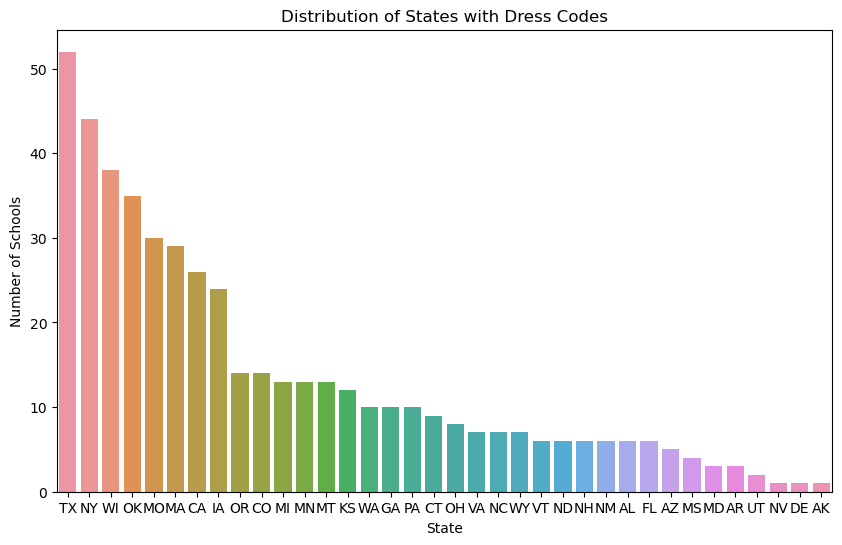

In [80]:
# Plot bar chart of counts of schools with dress codes, by state.
# Using Sewaborn library, not covered in class.
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=school_metadata_df, order=school_metadata_df['state'].value_counts().index)
plt.title('Distribution of States with Dress Codes')
plt.xlabel('State')
plt.ylabel('Number of Schools')
plt.show()